# PE2 Experimente mit dem Perzeptron

In [1]:
import numpy as np
from ki_kurs.knn import Perceptron

from pprint import pprint
import matplotlib.pyplot as plt

## Was kann das Perzeptron?
In diesem Notebook kann man mit unserem einfachen Perzeptron experimentieren

### 1. Einfache Aussagenlogik

Wir probieren unser generisches Perzeptron wieder an den logischen Schaltungen aus.

In [2]:
x = np.array([[x,y] for x in [0,1] for y in [0,1]])

logic_functions = {"AND": lambda a,b : a and b, 
                   "OR": lambda a,b : a or b, 
                   "NAND": lambda a,b : not (a or b ), 
                   "XOR": lambda a,b : (a and not b) or (not a and b)
                  }

for n,f in logic_functions.items():
    t = [[f(a,b)] for [a,b] in x]  
    p = Perceptron(2,1)
    p.train(x,t,epochs = 1)
    print(f'--- {n} ---')
    for tx in x:    
        print(f'{tx} -> {p.forward(tx)}')   

--- AND ---
[0 0] -> [0]
[0 1] -> [0]
[1 0] -> [0]
[1 1] -> [0]
--- OR ---
[0 0] -> [1]
[0 1] -> [1]
[1 0] -> [0]
[1 1] -> [1]
--- NAND ---
[0 0] -> [1]
[0 1] -> [0]
[1 0] -> [1]
[1 1] -> [0]
--- XOR ---
[0 0] -> [1]
[0 1] -> [1]
[1 0] -> [1]
[1 1] -> [1]


### 2. Mustererkennung

Das Perzeptron wurde auch zur Zeichenerkennung eingesetzt. Wir wollen einmal versuchen, ob wir vier verschiedene Zeichen Ziffern zuordnen können. Unserer Zeichensatz ist also recht klein, und er besteht auch nur aus 4x4 Pixeln:

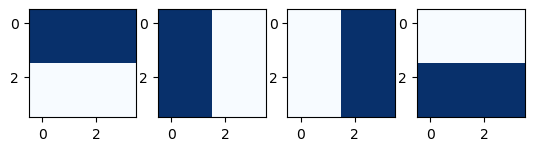

In [3]:
def plot_zeichen(z):
    img = np.reshape(z,(4,4)).astype(float)           
    plt.imshow(img,cmap='Blues')

zeichensatz = {"eins" : [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0],
               "zwei" : [1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0],
               "drei" : [0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1],
               "vier" : [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]}

zeichen = list(zeichensatz.values())

werte = [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]

for n,z in enumerate(zeichen):
    plt.subplot(1,4,n+1)
    plot_zeichen(z)


Wir erzeugen und trainieren unser Perzeptron:

In [4]:
p = Perceptron(16,4)
p.train(zeichen,werte,epochs=1000)

Unser Perzeptron kann nun die vier Muster richtig bestimmen:

In [5]:
for z,w in zip(zeichen, werte):
    print(f'{w}: {z} -> {p.forward(z)}')   

[1, 0, 0, 0]: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0] -> [1 0 0 0]
[0, 1, 0, 0]: [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0] -> [0 1 0 0]
[0, 0, 1, 0]: [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1] -> [0 0 1 0]
[0, 0, 0, 1]: [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] -> [0 0 0 1]


Was passiert aber, wenn wir ein nicht-trainiertes Muster eingeben, weil beim "Einscannen" unseres Zeichensatzes ein Fehler aufgetreten ist?

[1, 0, 0, 0]: [1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0] -> [1 1 0 0]
[0, 1, 0, 0]: [1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0] -> [0 1 0 0]
[0, 0, 1, 0]: [0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1] -> [0 0 0 0]
[0, 0, 0, 1]: [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1] -> [0 0 0 0]


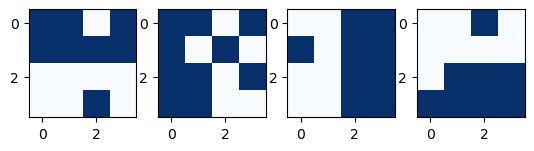

In [6]:
def rauschen(z,factor=0):
    return [ (1 - z if np.random.randint(100) < factor else z) for z in z]
    
for n,(z,w) in enumerate(list(zip(zeichen, werte))):
    z = rauschen(zeichen[n],10)
    plt.subplot(1,4,n+1)
    plot_zeichen(z)
    print(f'{w}: {z} -> {p.forward(z)}')   

Das Perzeptron ist nicht sonderlich robust gegenüber verrauschten Signalen.

[1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] -> [1 1 0 0]


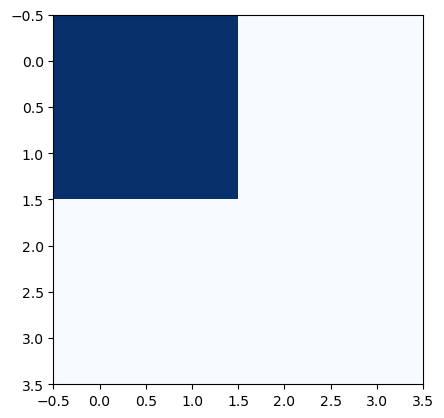

In [7]:
z = [1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0]

plot_zeichen(z)
print(f'{z} -> {p.forward(z)}')